In [ ]:
from fastai.vision.all import *
from fastai.test_utils import *
from fastai.metrics import error_rate
from fastai.vision.widgets import *

import matplotlib.pyplot as plt
import PIL.Image

import os
os.getcwd()

'/content'

In [ ]:
from fastai.vision.data import ImageDataLoaders

In [ ]:
root_dir = '{root path}'
path = Path(root_dir)
path.ls()

In [ ]:
fields = DataBlock(blocks=(ImageBlock(cls=PILImage), CategoryBlock),
   get_items=get_image_files,
   get_y=parent_label,
   item_tfms=Resize(224),
   batch_tfms=aug_transforms())

dls = fields.dataloaders(path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [143]:
learn_inf = load_learner('{model path}')

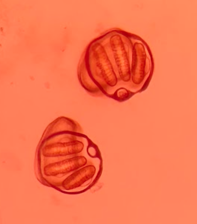

In [158]:
fn = '{model image}' #Replace with your own image
x = PILImage.create(fn); display(x.to_thumb(224,224))

dl = dls.test_dl([fn])
b = dl.one_batch()
xb_im = TensorImage(dls.train.decode(b)[0][0])
xb = b[0]


In [160]:
dl = dls.test_dl([fn])
b = dl.one_batch()
xb_im = TensorImage(dls.train.decode(b)[0][0])
xb = b[0]

In [161]:
learn_inf.model.cuda()
m = learn_inf.model.eval();

In [162]:
def hooked_backward(cat=0):
    with hook_output(m[0]) as hook_a: 
        with hook_output(m[0], grad=True) as hook_g:
            preds = m(xb)
            preds[0,int(cat)].backward()
    return hook_a,hook_g

In [163]:
hook_a,hook_g = hooked_backward()

acts  = hook_a.stored[0].cpu()
acts.shape

avg_acts = acts.mean(0)
avg_acts.shape

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


torch.Size([7, 7])

Pred: CM-L3-Poste-Re: 100.00%


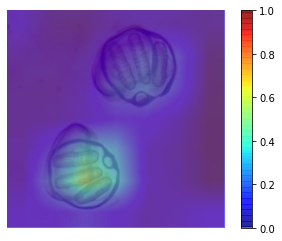

In [164]:
def show_heatmap(hm):
    _,ax = plt.subplots()
    xb_im.show(ctx=ax)
    img = ax.imshow(hm, alpha=0.6, extent=(0,224,224,0),
              interpolation='bilinear', cmap='jet', vmin=0.00, vmax=1.00)
    plt.colorbar(img);

show_heatmap(avg_acts)

# predict the image class
pred,pred_idx,probs = learn_inf.predict(fn)

print(f"Pred: {pred}: {probs[pred_idx].item()*100:.2f}%")